In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.layers import Conv1D, Flatten, Reshape

In [25]:
# Load the datasets
weather_df = pd.read_csv('weather_prediction_dataset.csv')
bbq_labels_df = pd.read_csv('weather_prediction_bbq_labels.csv')

In [26]:
# Display the first few rows of the weather dataset
print("First few rows of the weather dataset:")
print(weather_df.head(6))

First few rows of the weather dataset:
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   
5  20000106      1                  3            0.85          1.0244   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   
5                    0.56                 0.00       

In [27]:
# Display the first few rows of the BBQ labels dataset
print("\nFirst few rows of the BBQ labels dataset:")
print(bbq_labels_df.head(6))


First few rows of the BBQ labels dataset:
       DATE  BASEL_BBQ_weather  BUDAPEST_BBQ_weather  DE_BBQ_weather  \
0  20000101              False                 False           False   
1  20000102              False                 False           False   
2  20000103              False                 False           False   
3  20000104              False                 False           False   
4  20000105              False                 False           False   
5  20000106              False                 False           False   

   DRESDEN_BBQ_weather  DUSSELDORF_BBQ_weather  HEATHROW_BBQ_weather  \
0                False                   False                 False   
1                False                   False                 False   
2                False                   False                 False   
3                False                   False                 False   
4                False                   False                 False   
5                Fal

In [28]:
# Get the column names and number of columns in the BBQ labels dataset
bbq_columns_len, bbq_columns = len(bbq_labels_df.columns), bbq_labels_df.columns
print("\nNumber of columns in the BBQ labels dataset:", bbq_columns_len)
print("Column names in the BBQ labels dataset:", bbq_columns)


Number of columns in the BBQ labels dataset: 18
Column names in the BBQ labels dataset: Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
       'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
       'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
       'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
       'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
       'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
      dtype='object')


In [29]:
# Get the column names in the weather dataset
weather_columns = weather_df.columns
print("\nColumn names in the weather dataset:", weather_columns)


Column names in the weather dataset: Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)


In [30]:
# Selecting Dresden's weather data for BBQ prediction
dresden_weather_columns = weather_columns[30:41]
dresden_weather_df = weather_df[['DATE'] + list(dresden_weather_columns)]
dresden_weather_df['BBQ'] = bbq_labels_df['DRESDEN_BBQ_weather']

<ipython-input-30-bdfde4e4bfa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dresden_weather_df['BBQ'] = bbq_labels_df['DRESDEN_BBQ_weather']


In [31]:
# Display the first few rows of Dresden's weather data
print("\nDresden's weather data for BBQ prediction:")
print(dresden_weather_df.head())


Dresden's weather data for BBQ prediction:
       DATE  DRESDEN_cloud_cover  DRESDEN_wind_speed  DRESDEN_wind_gust  \
0  20000101                    8                 3.2                7.2   
1  20000102                    7                 4.0                8.8   
2  20000103                    7                 5.4               12.1   
3  20000104                    8                 6.0               14.4   
4  20000105                    2                 5.6               15.8   

   DRESDEN_humidity  DRESDEN_global_radiation  DRESDEN_precipitation  \
0              0.89                      0.09                   0.32   
1              0.89                      0.23                   0.00   
2              0.79                      0.18                   0.00   
3              0.88                      0.11                   0.22   
4              0.76                      0.49                   0.00   

   DRESDEN_sunshine  DRESDEN_temp_mean  DRESDEN_temp_min  DRESDEN_temp_m

# Data Visualization

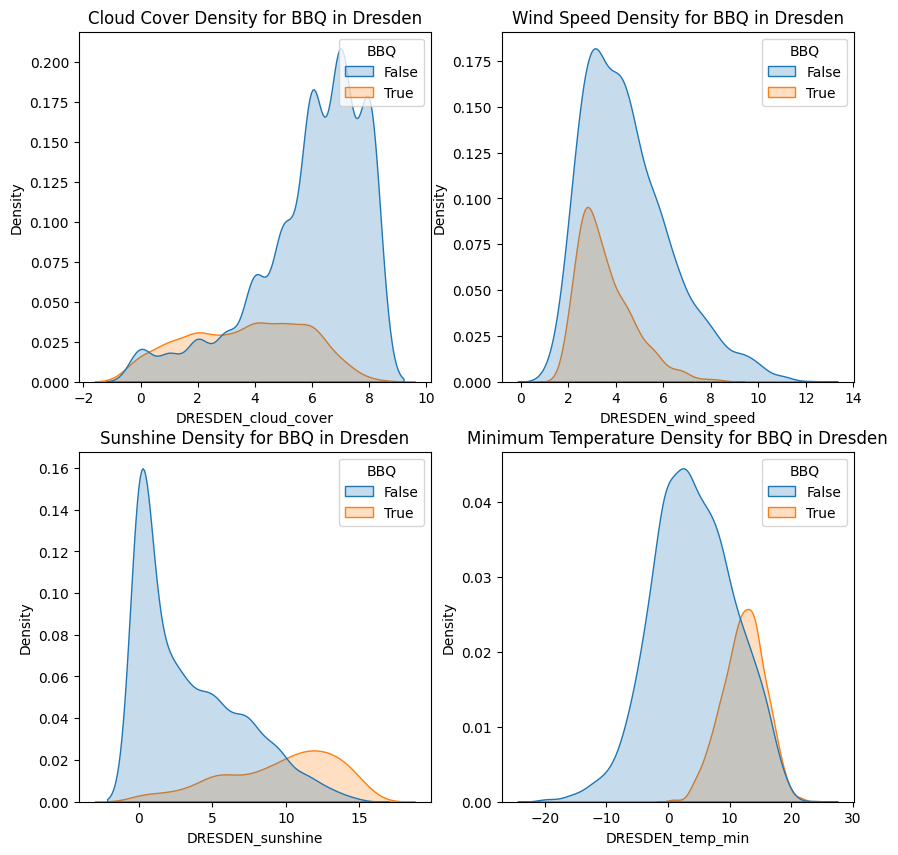

In [32]:
# Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_cloud_cover', hue='BBQ', fill=True, ax=axs[0, 0])
axs[0, 0].set_title('Cloud Cover Density for BBQ in Dresden')
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_wind_speed', hue='BBQ', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Wind Speed Density for BBQ in Dresden')
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_sunshine', hue='BBQ', fill=True, ax=axs[1, 0])
axs[1, 0].set_title('Sunshine Density for BBQ in Dresden')
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_temp_min', hue='BBQ', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Minimum Temperature Density for BBQ in Dresden')
plt.show()

<ipython-input-33-68a9544d8eed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dresden_weather_df, x='BBQ', palette='Set2')


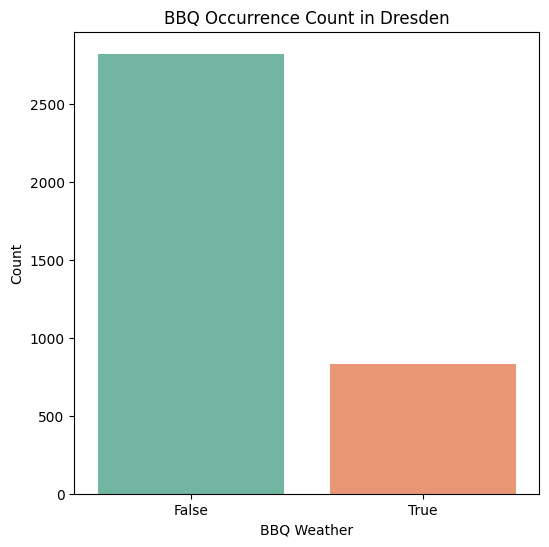

In [33]:
# BBQ Occurance Countplot
plt.figure(figsize=(6, 6))
sns.countplot(data=dresden_weather_df, x='BBQ', palette='Set2')
plt.title('BBQ Occurrence Count in Dresden')


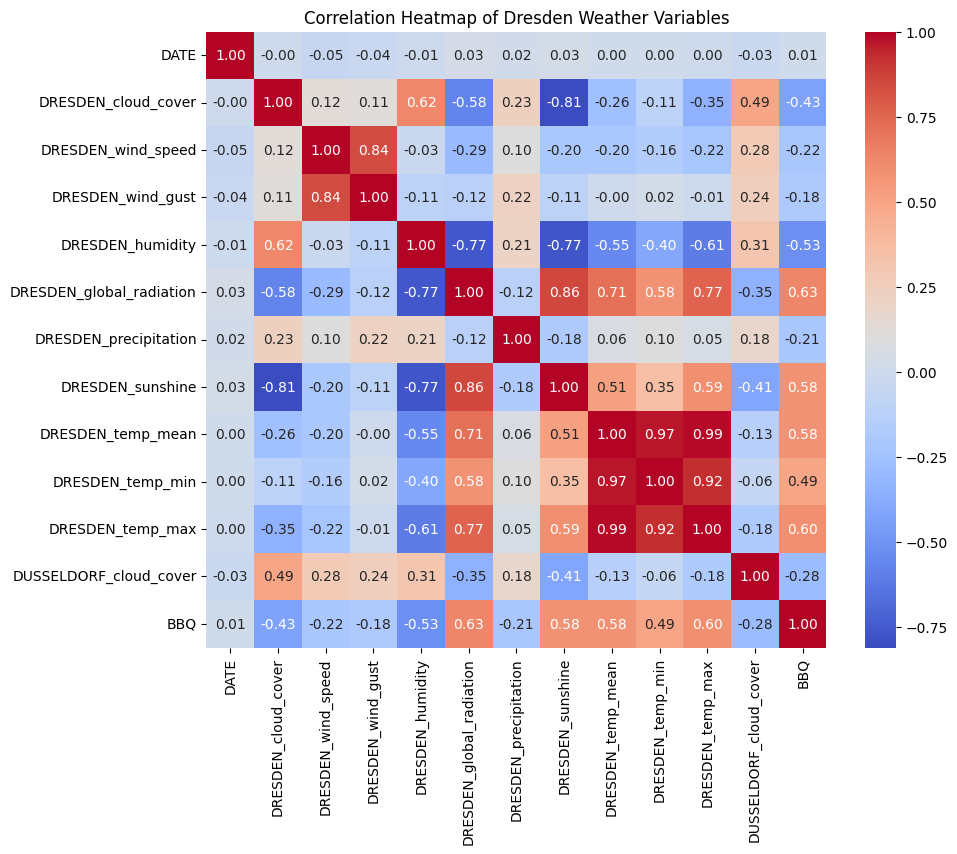

In [34]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dresden_weather_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dresden Weather Variables')
plt.show()

<ipython-input-35-d2f6ac38d4cd>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dresden_weather_df, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1, 0])


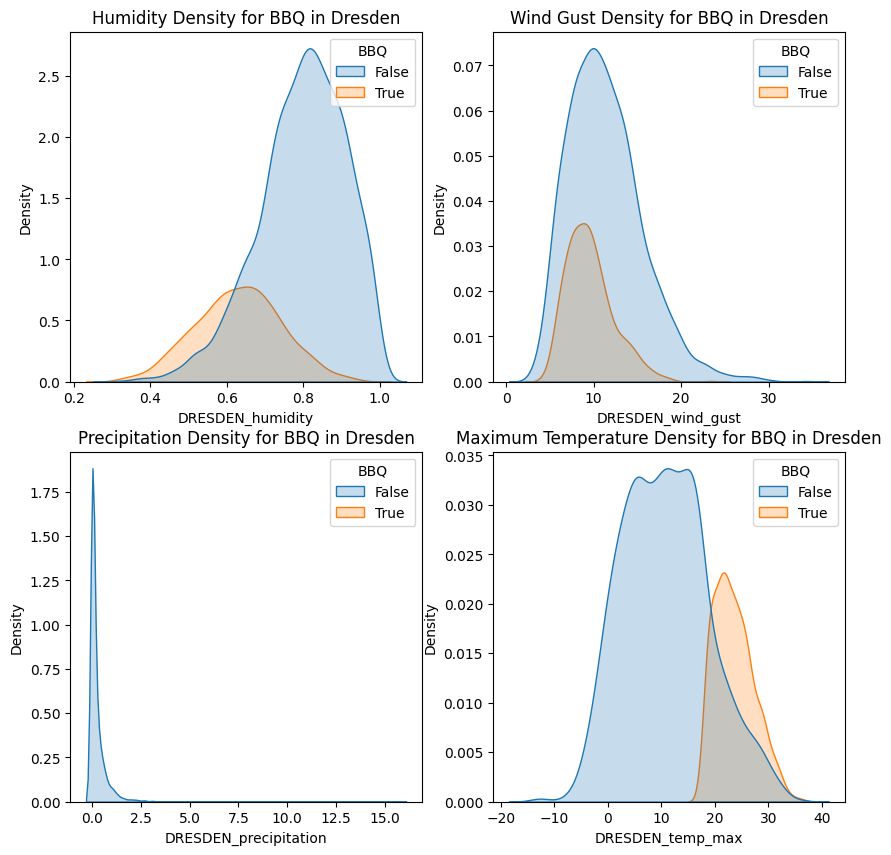

In [35]:
# Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_humidity', hue='BBQ', fill=True, ax=axs[0, 0])
axs[0, 0].set_title('Humidity Density for BBQ in Dresden')
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_wind_gust', hue='BBQ', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Wind Gust Density for BBQ in Dresden')
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1, 0])
axs[1, 0].set_title('Precipitation Density for BBQ in Dresden')
sns.kdeplot(data=dresden_weather_df, x='DRESDEN_temp_max', hue='BBQ', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Maximum Temperature Density for BBQ in Dresden')
plt.show()

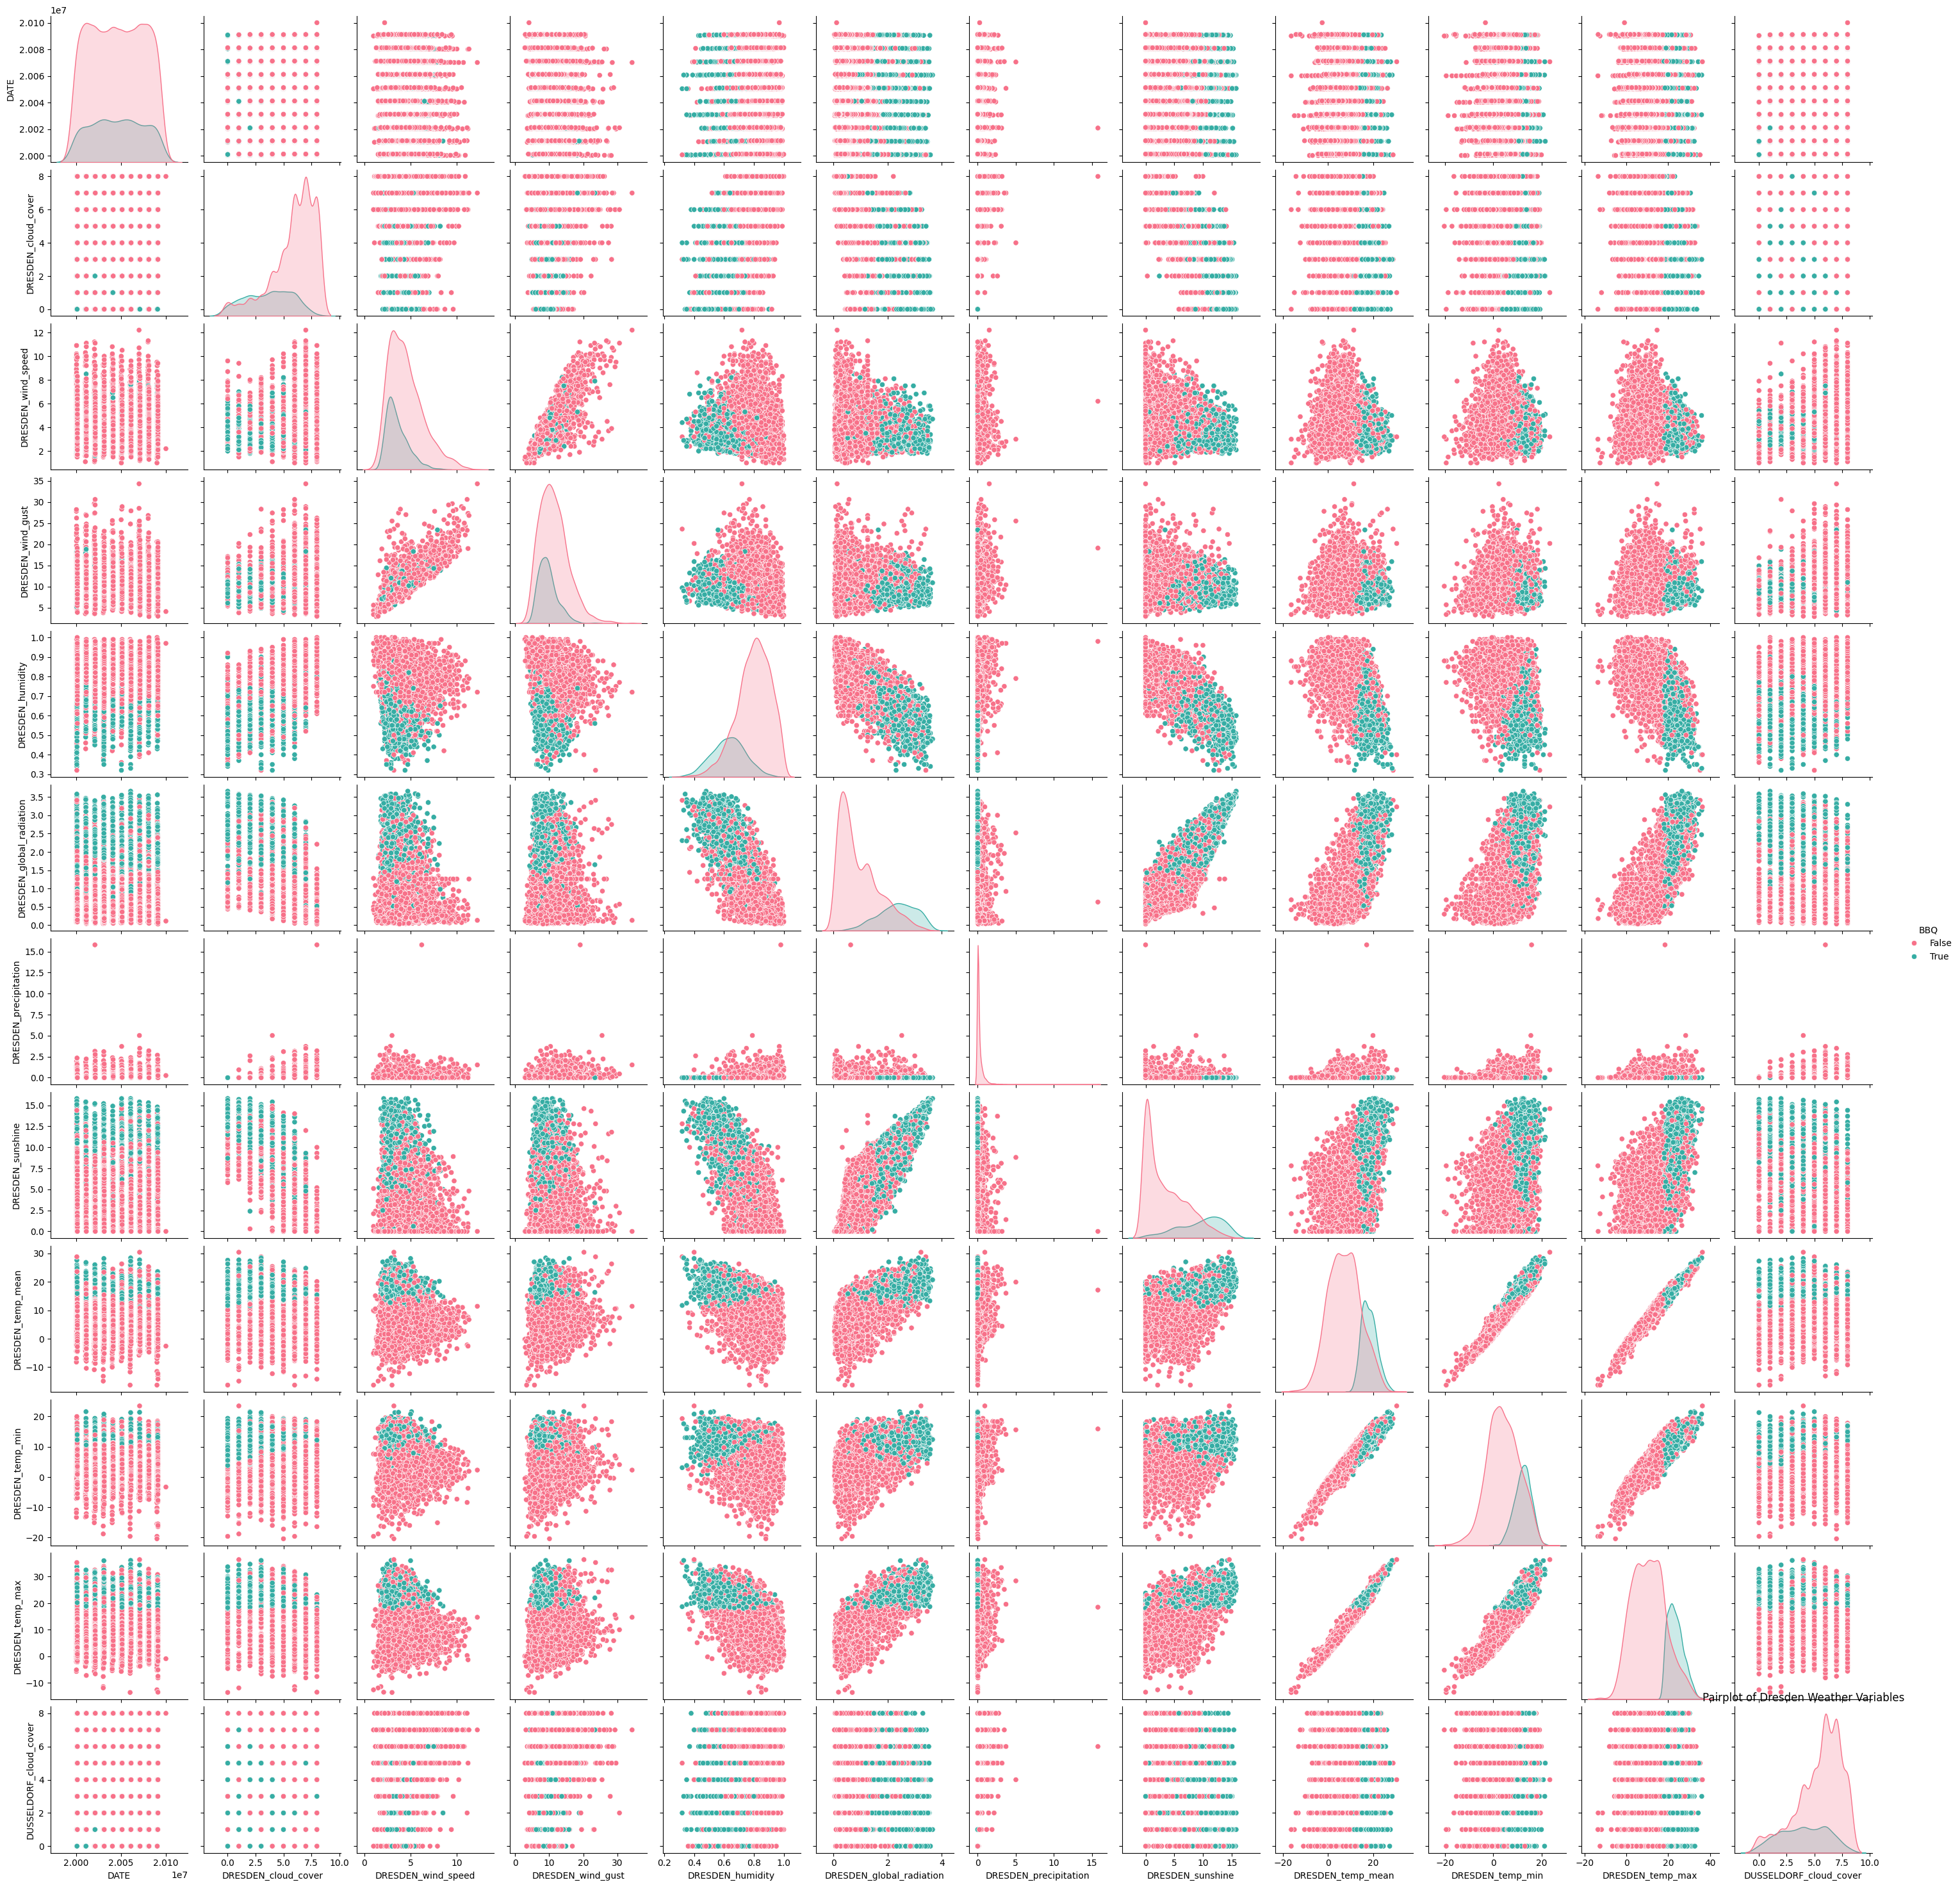

In [36]:
# Pairplot
sns.pairplot(dresden_weather_df, hue='BBQ', palette='husl')
plt.title('Pairplot of Dresden Weather Variables')
plt.show()

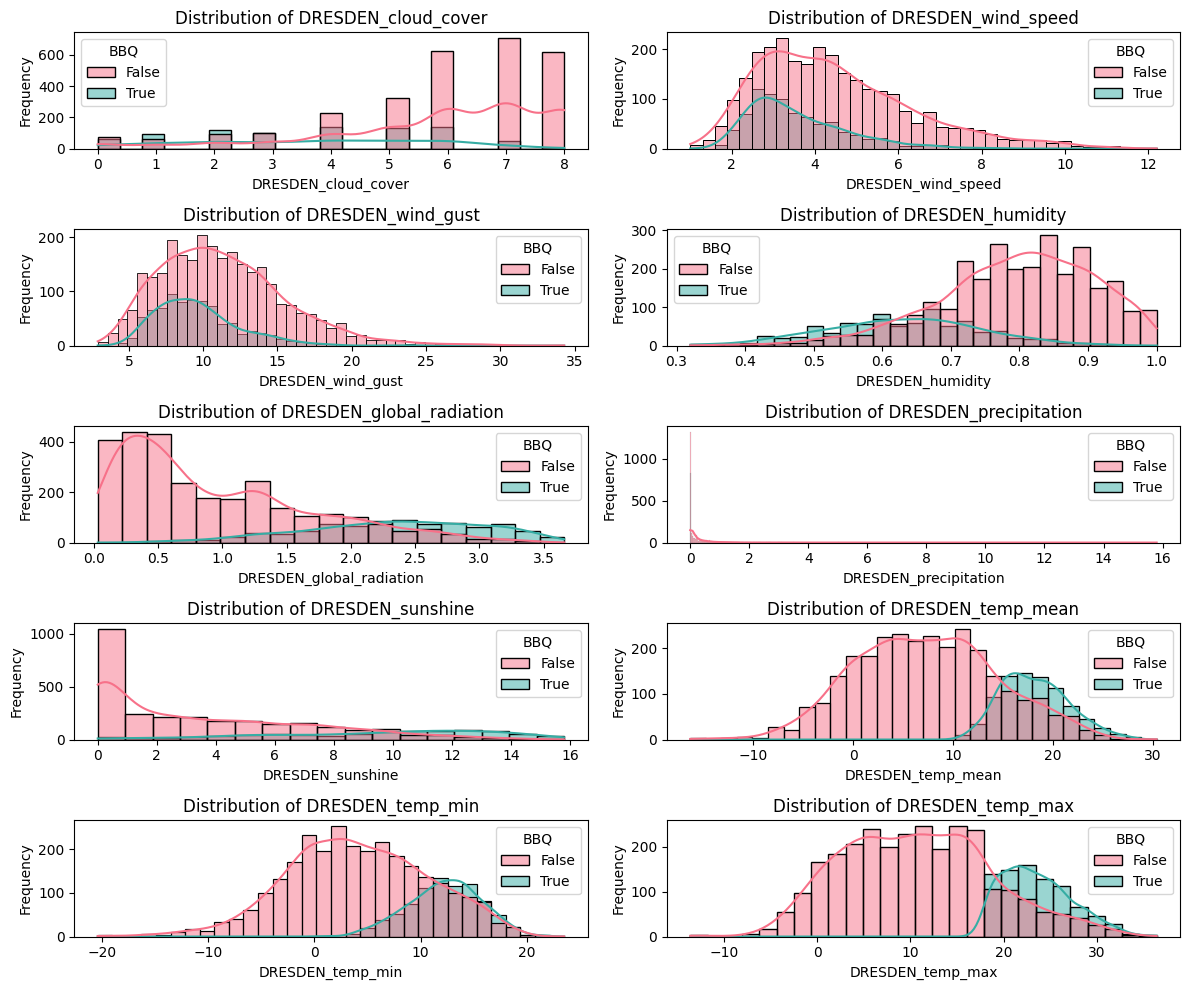

In [37]:
# Distribution plots for weather variables
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
variables = ['DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
             'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
             'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min', 'DRESDEN_temp_max']

for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=dresden_weather_df, x=var, kde=True, hue='BBQ', palette='husl')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

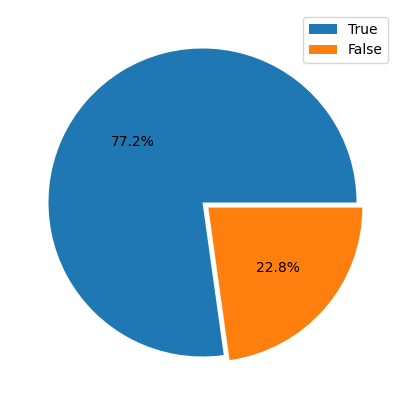

In [38]:
# Piechart for BBQ weather
plt.figure(figsize=(5, 5))
explode = [0, 0.05]
plt.pie(dresden_weather_df['BBQ'].value_counts(), explode=explode, autopct='%.1f%%')
plt.legend(['True', 'False'])
plt.show()

In [39]:
# Data Preparation
X = dresden_weather_df.drop(['DATE','BBQ'], axis=1)
y = dresden_weather_df['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [20]:
# ANN Model Building
model = Sequential([
    Dense(X_train.shape[1], activation="relu"),
    Dense(X_train.shape[1] // 2, activation="relu"),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)

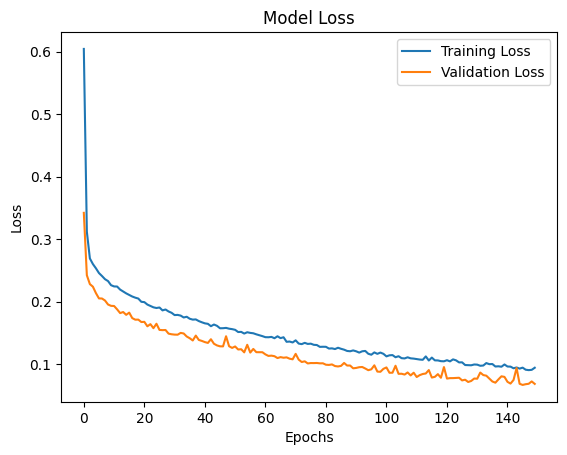

In [21]:
# Plotting Loss and Accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

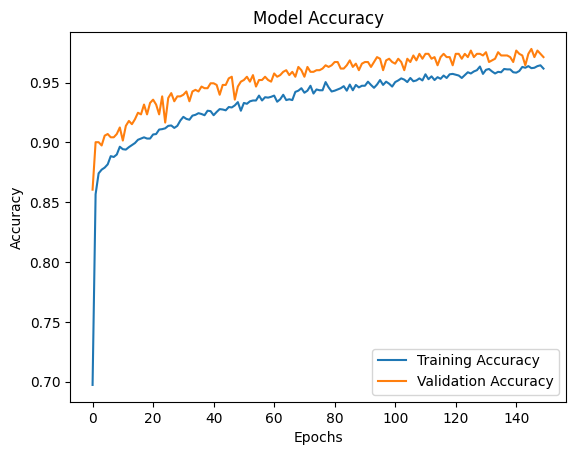

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Model Evaluation
predictions = np.round(model.predict(X_test))
print(classification_report(y_test, predictions))

23/23 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       574
        True       0.91      0.96      0.93       157

    accuracy                           0.97       731
   macro avg       0.95      0.97      0.96       731
weighted avg       0.97      0.97      0.97       731



In [40]:
# Calculate accuracy for ANN predictions
ann_acc = accuracy_score(y_test, predictions)

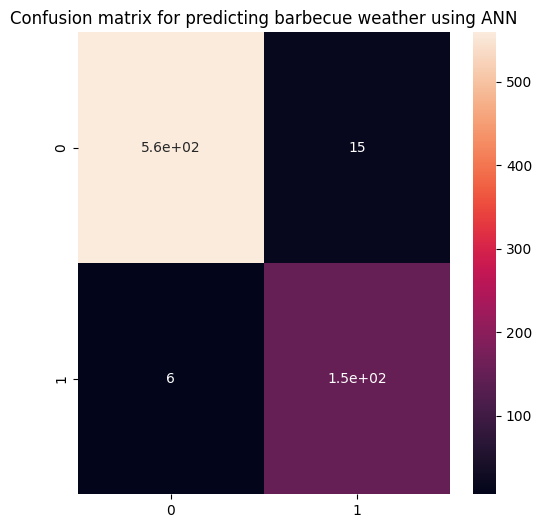

In [41]:
# Visualize confusion matrix for ANN predictions
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
plt.title('Confusion matrix for predicting barbecue weather using ANN')
plt.show()

# CNN Model Building

In [42]:
# Reshape the input data for CNN
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1], 1))

In [43]:
# Define the CNN model
model_cnn = Sequential([
    Reshape((1, X_train.shape[1], 1)),
    Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(1, X_train.shape[1], 1)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [44]:
# Compile the CNN model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# Train the CNN model
history_cnn = model_cnn.fit(x=X_train_reshaped, y=y_train, epochs=150, validation_data=(X_test_reshaped, y_test), verbose=0)

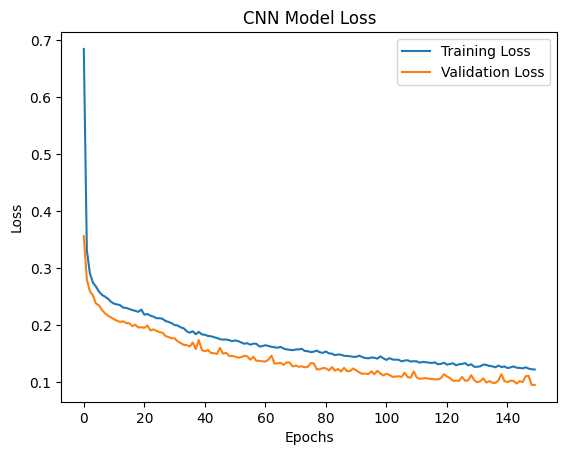

In [46]:
# Plot Loss and Accuracy for CNN model
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

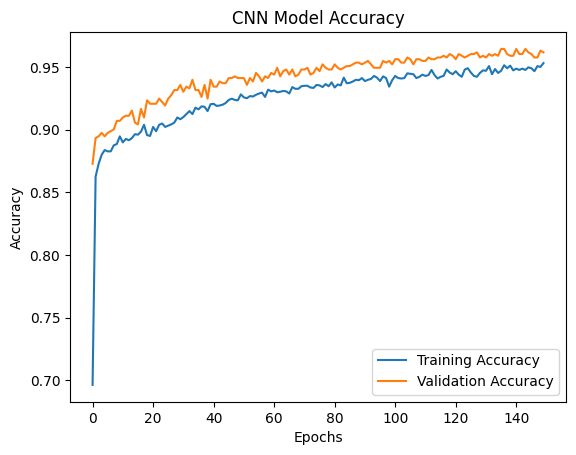

In [47]:
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
# Make predictions using CNN model
pred_cnn = np.round(model_cnn.predict(X_test_reshaped))

23/23 [==============================] - 0s 1ms/step


In [49]:
# Print classification report for CNN predictions
print(classification_report(y_test, pred_cnn))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       574
        True       0.92      0.90      0.91       157

    accuracy                           0.96       731
   macro avg       0.95      0.94      0.94       731
weighted avg       0.96      0.96      0.96       731



In [50]:
# Calculate accuracy for CNN predictions
cnn_acc = accuracy_score(y_test, pred_cnn)

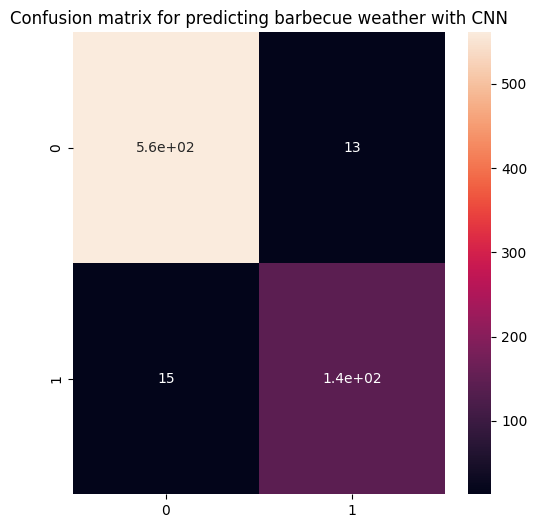

In [51]:
# Visualize confusion matrix for CNN predictions
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred_cnn), annot=True)
plt.title('Confusion matrix for predicting barbecue weather with CNN')
plt.show()

<ipython-input-52-4c780256431a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Methods', y='Accuracy', data=df_comparison, palette=['Black', 'Purple'])


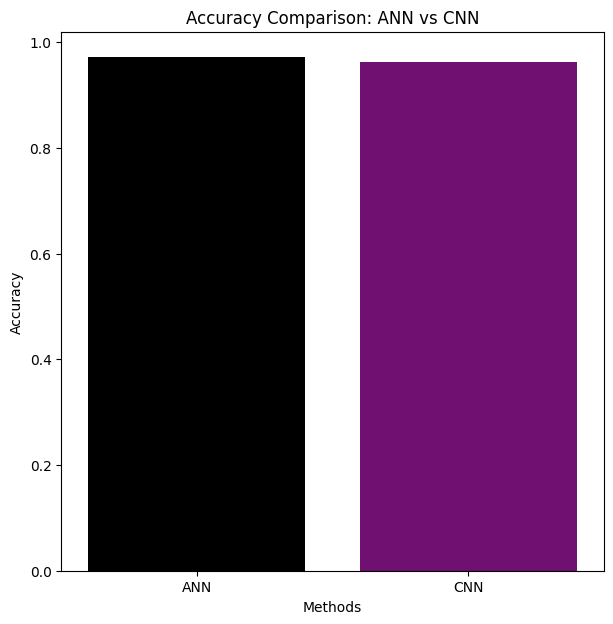

In [52]:
# Plot the comparison of accuracy between ANN and CNN
methods = ['ANN', 'CNN']
accuracies = [ann_acc, cnn_acc]
df_comparison = pd.DataFrame({'Methods': methods, 'Accuracy': accuracies})

plt.figure(figsize=(7, 7))
sns.barplot(x='Methods', y='Accuracy', data=df_comparison, palette=['Black', 'Purple'])
plt.title('Accuracy Comparison: ANN vs CNN')
plt.show()